<a href="https://colab.research.google.com/github/NgaAdrain/TEAM_Enter_Text_Here/blob/master/Data_Varification/CSV_DATA_Verification_Jeong_0702.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###졸업과제 2-3주차 과제
<br> Google Colab with TensorFlow 2.0의 jupyter notebook에<br>
센서 데이터 파일 csv파일을 불러서 표 형식으로 출력하기.

#구글 코랩 원격 컴퓨터 환경 확인

<b>TensorFlow version</b>

In [ ]:
# Import the TensorFlow
import tensorflow as tf
tf.__version__

'2.2.0'

<b>Python version</b>

In [ ]:
!python --version

Python 3.6.9


<b>Operating System Information</b>

In [ ]:
!cat /etc/issue.net\

Ubuntu 18.04.3 LTS


<b>CPU information</b>

In [ ]:
!head /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0x1
cpu MHz		: 2000.170
cache size	: 39424 KB
physical id	: 0


#데이터 파일 읽기

## csv로 변환된 파일을 읽어 들여서 출력해보기

csv 모듈 import

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
!ls

drive  sample_data


In [ ]:
data_file = pd.read_csv('/content/drive/My Drive/20200518_153448_crossover.csv', encoding='utf-8')
data_file.drop(['Odometer','Gear(dashboard)','Avg_fuel_consumption','Clutch'],axis='columns', inplace=True)
data_file.drop(['            Fuel_level','            Coordinate(location)_x','Coordinate(location)_y','Coordinate(location)_z','Unnamed: 22'],axis='columns',inplace=True)
data_file.drop(['            Acceleration_x','Acceleration_y', 'Acceleration_z'],axis='columns',inplace=True)
data_file.drop(['            Rotation_angle_x','Rotation_angle_y', 'Rotation_angle_z'],axis='columns',inplace=True)
data_file = data_file.rename(columns=({'            Steering_wheel_x':'Steering_wheel_x'}))
data_file.head(30)

,Timestamp,RPM,Velocity,Steering_wheel_x,Accelerator,Brake,Winker(left),Winker(right)
0,20200518_153448_1400277320,1008.092712,58.044533,0.004150,0.000000,0.00.0,0,0
1,20200518_153448_1400310652,1007.521729,58.011726,-0.001328,0.000000,0.00.0,0,0
2,20200518_153448_1400343984,1013.867004,57.990131,-0.007218,0.190471,0.00.0,0,0
3,20200518_153448_1400360650,1019.963989,57.970993,-0.012100,0.380949,0.00.0,0,0
4,20200518_153448_1400377316,1025.135864,57.963139,-0.020920,0.601564,0.00.0,0,0
5,20200518_153448_1400427314,1029.665405,57.956039,-0.024430,0.699222,0.00.0,0,0
6,20200518_153448_1400443980,1038.594971,57.947765,-0.029923,0.874998,0.00.0,0,0
7,20200518_153448_1400493978,1040.766846,57.951202,-0.031327,0.929686,0.00.0,0,0
8,20200518_153448_1400510644,1045.351318,57.978497,-0.031418,1.000000,0.00.0,0,0
9,20200518_153448_1400543976,1045.973145,57.993145,-0.030686,1.000000,0.00.0,0,0


데이터 파일에는
- Timestamp	:	년_시분초_밀리초
- Odometer	:	주행거리계
- Gear	:		기어 => D,R,P만 사용하기 때문에 사용X
- RPM		:	엔진회전수
- Fuel_level	:	연료 잔량 => 사용 X
- Avg_comsumption :	연료소모율 => 사용 X
- Velocity	:	속도
- Acceleration_x	:	x축 가속
- Acceleration_y	:	y축 가속
- Acceleration_z	:	z축 가속
- Coordinate_x	;	x축 위치 => 사용 X
- Coordinate_y	:	y축 위치 => 사용 X
- Coordinate_z	:	z축 위치 => 사용 X
- Rotation_x	:	x축 회전
- Rotation_y	:	y축 회전
- Rotation_z	:	z축 회전
- Accelerator  : 악셀 페달
- Brake  : 브레이크 페달
- Winker(left)  : 좌측 깜빡이
- Winker(right) : 우측 깜빡이

In [ ]:
data_file.to_csv('/content/drive/My Drive/20200518_153448_crossover_mod.csv')
print(data_file.columns)

Index(['Timestamp', 'RPM', 'Velocity', 'Steering_wheel_x', 'Accelerator',
       'Brake', 'Winker(left)', 'Winker(right)'],
      dtype='object')


## RPM			엔진회전수

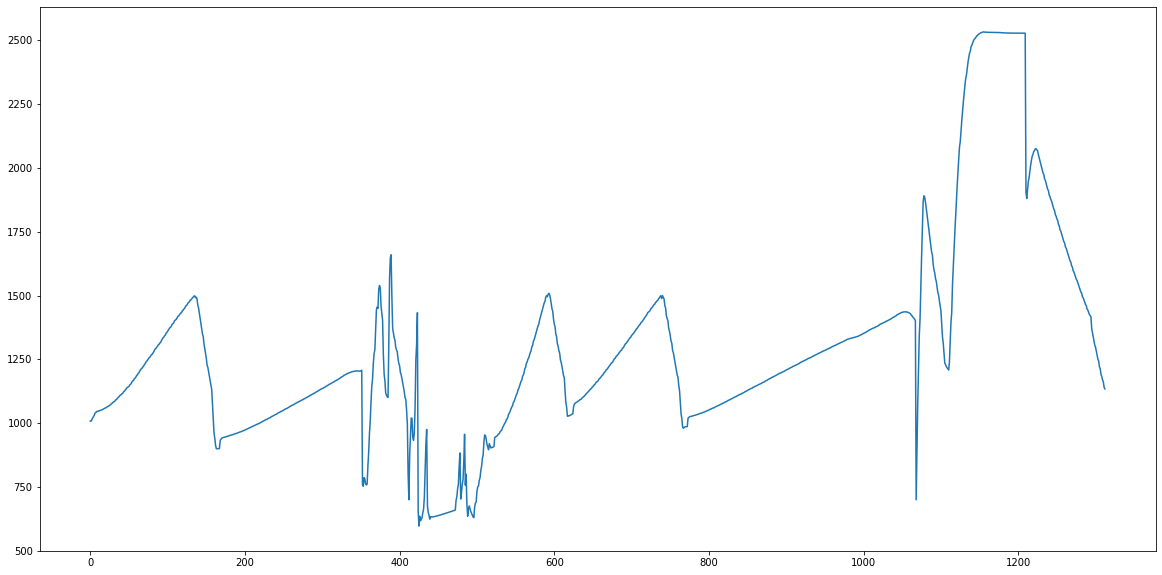

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
data_file['RPM'].plot()
plt.show()

###액셀 페달 인식

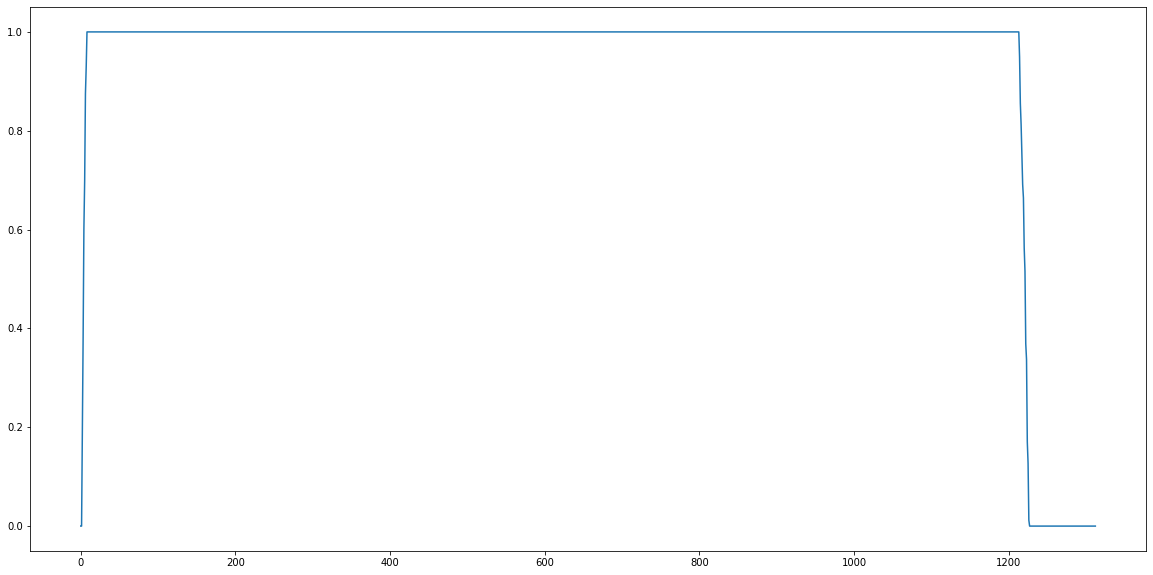

In [ ]:
data_file['Accelerator'].plot()
plt.show()

## Velocity 속도

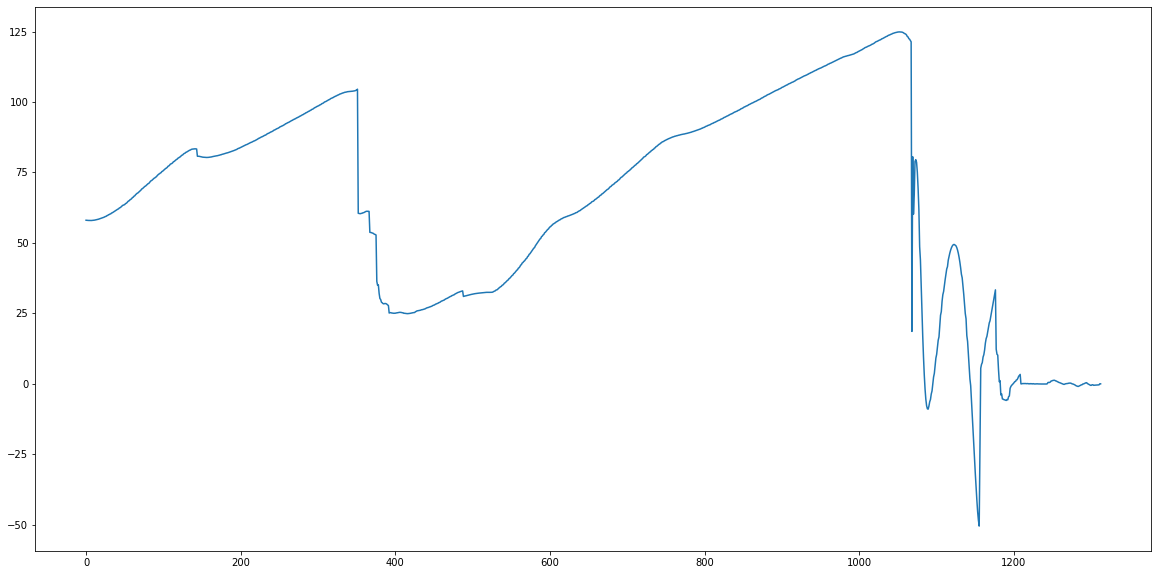

In [ ]:
data_file['Velocity'].plot()
plt.show()

## Acceleration 가속

- Acceleration_x x축 가속
- Acceleration_y y축 가속
- Acceleration_z z축 가속

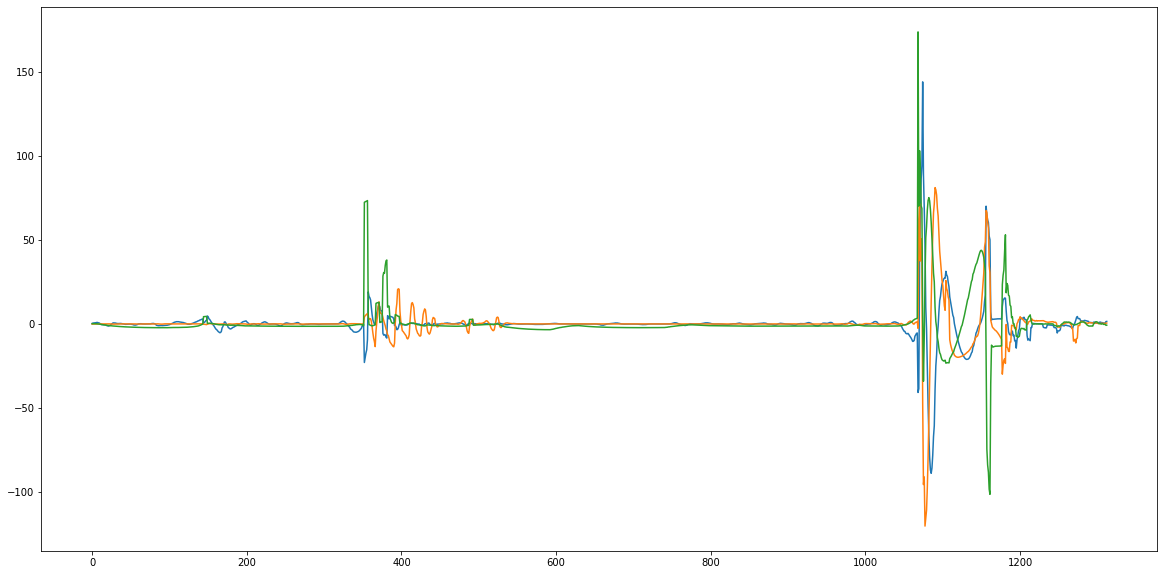

In [ ]:
data_file['            Acceleration_x'].plot() #BLUE
data_file['Acceleration_y'].plot() #ORANGE
data_file['Acceleration_z'].plot() #GREEN
plt.show()

## Coordinate(Location) 위치

- Coordinate_x x축 위치
- Coordinate_y y축 위치
- Coordinate_z z축 위치

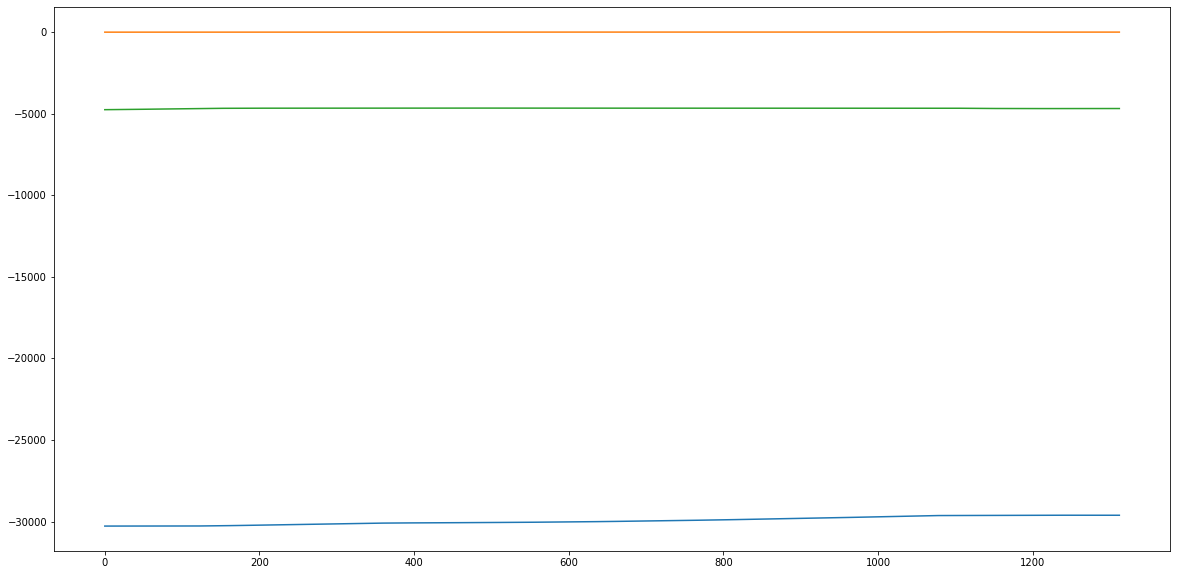

In [ ]:
data_file['            Coordinate(location)_x'].plot() #BLUE
data_file['Coordinate(location)_y'].plot() #ORANGE
data_file['Coordinate(location)_z'].plot() #GREEN
plt.show()

## Rotation 회전

Rotation_x x축 회전
Rotation_y y축 회전
Rotation_z z축 회전

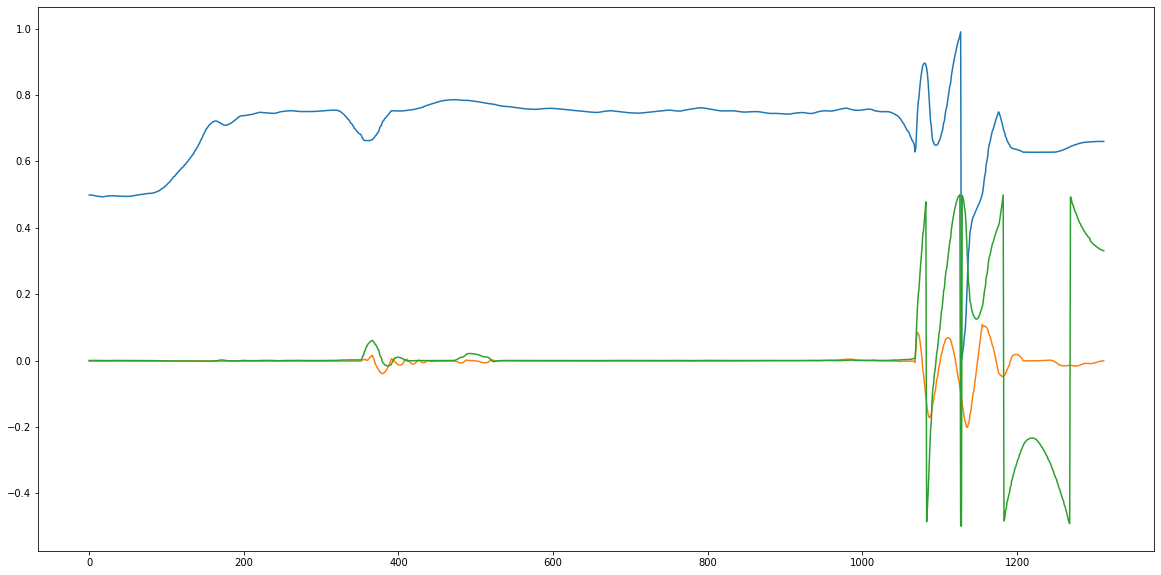

In [ ]:
data_file['            Rotation_angle_x'].plot() #BLUE
data_file['Rotation_angle_y'].plot() #ORANGE
data_file['Rotation_angle_z'].plot() #GREEN
plt.show()

## Steering_wheel 핸들 조작

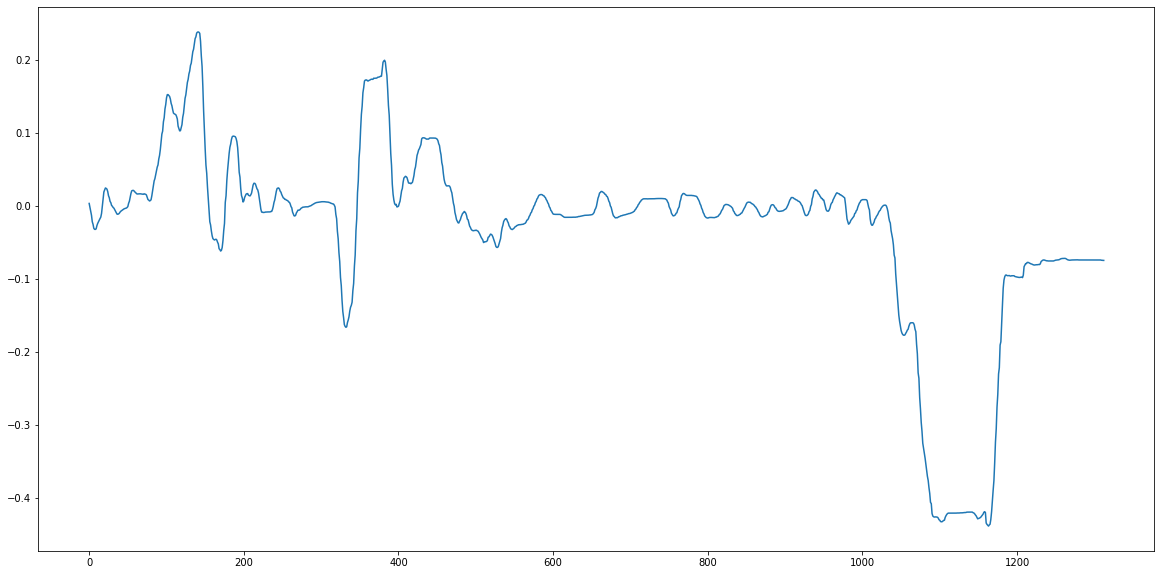

In [ ]:
data_file['            Steering_wheel_x'].plot()
plt.show()

## 데이터 확인용_2

In [12]:
import csv

In [13]:
data = open('/content/drive/My Drive/20200518_153448_crossover_mod.csv','r',encoding='utf-8')
read_data = csv.reader(data)
line = []
for line in read_data:
  print(line)

['', 'Timestamp', 'RPM', 'Velocity', 'Steering_wheel_x', 'Accelerator', 'Brake', 'Winker(left)', 'Winker(right)']
['0', '20200518_153448_1400277320', '1008.0927119999999', '58.04453278', '0.0041504540000000005', '0.0', ' 0.00.0', '0', '0']
['1', '20200518_153448_1400310652', '1007.5217289999999', '58.01172638', '-0.001327535', '0.0', ' 0.00.0', '0', '0']
['2', '20200518_153448_1400343984', '1013.867004', '57.99013138', '-0.007217517', '0.190470755', ' 0.00.0', '0', '0']
['3', '20200518_153448_1400360650', '1019.9639890000001', '57.97099304', '-0.012100403999999999', '0.38094911', ' 0.00.0', '0', '0']
['4', '20200518_153448_1400377316', '1025.135864', '57.96313858', '-0.020920118', '0.60156405', ' 0.00.0', '0', '0']
['5', '20200518_153448_1400427314', '1029.665405', '57.95603943', '-0.024429694', '0.69922179', ' 0.00.0', '0', '0']
['6', '20200518_153448_1400443980', '1038.594971', '57.94776535', '-0.029922942', '0.874998093', ' 0.00.0', '0', '0']
['7', '20200518_153448_1400493978', '104